**2.1 Exercise - 1:**

**1. Read and display the image.**

• Read the image using the Pillow library and display it.
• You can also use matplotlib to display the image.

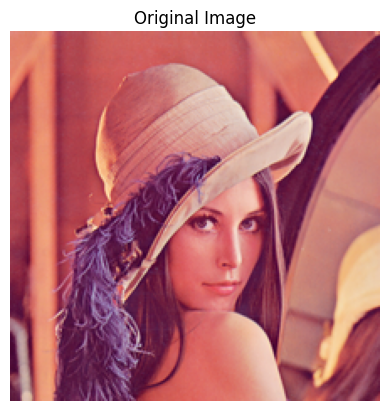

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open("/content/drive/MyDrive/ai concept/Lenna_(test_image).png")
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2. Display only the top left corner of 100x100 pixels.**
• Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and
Array Indexing.

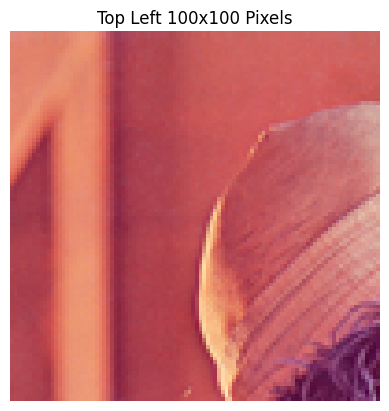

In [ ]:
image_array = np.array(image)
top_left = image_array[:100, :100]
plt.imshow(top_left)
plt.title("Top Left 100x100 Pixels")
plt.axis("off")
plt.show()

**3. Show the three color channels (R, G, B).**

• Separate the image into its three color channels (Red, Green, and Blue) and display them
individually, labeling each channel as R, G, and B.{Using NumPy.}

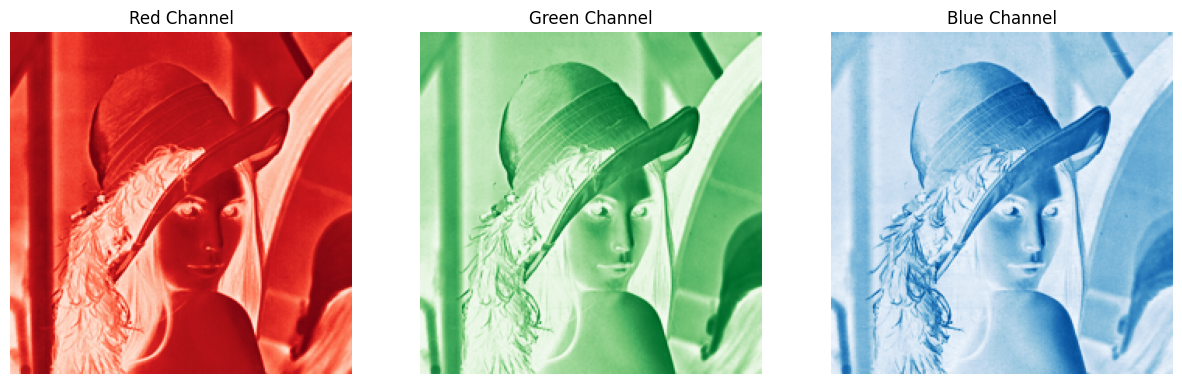

In [ ]:
r, g, b = image.split()
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(r, cmap="Reds")
axs[0].set_title("Red Channel")
axs[1].imshow(g, cmap="Greens")
axs[1].set_title("Green Channel")
axs[2].imshow(b, cmap="Blues")
axs[2].set_title("Blue Channel")
for ax in axs:
    ax.axis("off")
plt.show()

**4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:**

• Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a
light gray color), and then display the modified image.

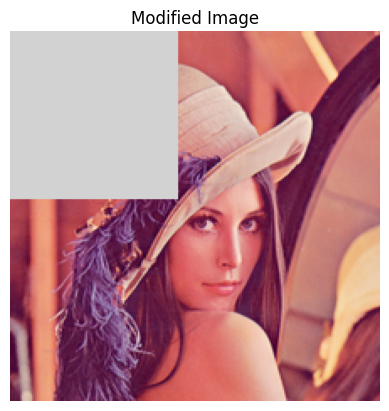

In [ ]:
image_array[:100, :100] = 210
plt.imshow(image_array)
plt.title("Modified Image")
plt.axis("off")
plt.show()

**2.2 Exercise - 2:**

**Complete all the Task.**

1. Load and display a grayscale image.
• Load a grayscale image using the Pillow library.
• Display the grayscale image using matplotlib.
2. Extract and display the middle section of the image (150 pixels).
• Extract a 150 pixel section from the center of the image using NumPy array slicing.
• Display this cropped image using matplotlib.
3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).
• Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values
above 100 to 255 (creating a binary image).
• Display the resulting binary image.
4. Rotate the image 90 degrees clockwise and display the result.
• Rotate the image by 90 degrees clockwise using the Pillow rotate method or by manipulating
the image array.
• Display the rotated image using matplotlib.
5. Convert the grayscale image to an RGB image.
• Convert the grayscale image into an RGB image where the grayscale values are replicated
across all three channels (R, G, and B).
• Display the converted RGB image using matplotlib.

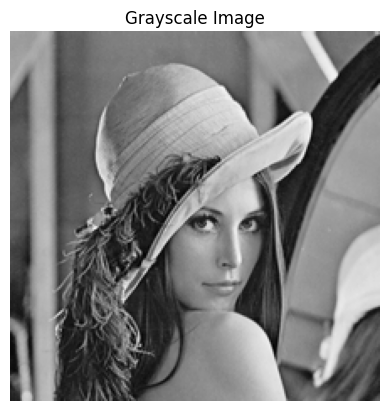

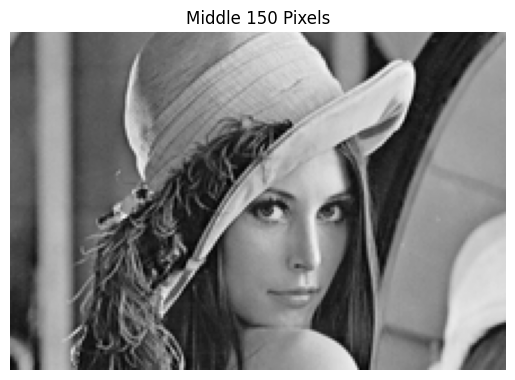

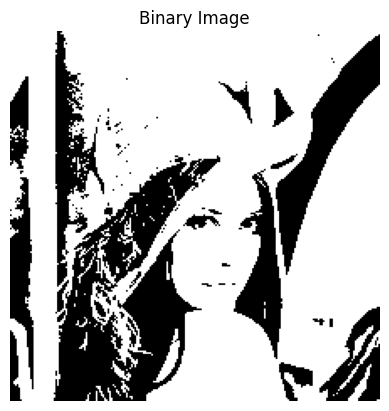

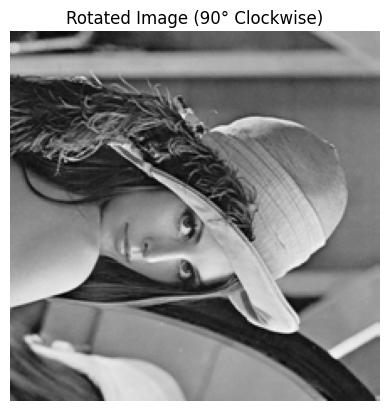

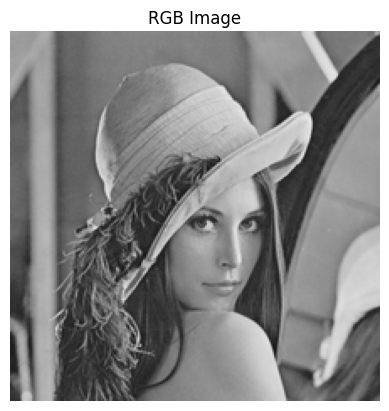

In [ ]:
# 1

gray_image = image.convert("L")
plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

# 2

width, height = gray_image.size
middle = gray_image.crop((0, height//2 - 75, width, height//2 + 75))
plt.imshow(middle, cmap="gray")
plt.title("Middle 150 Pixels")
plt.axis("off")
plt.show()

# 3

gray_array = np.array(gray_image)
binary_image = np.where(gray_array < 100, 0, 255)
plt.imshow(binary_image, cmap="gray")
plt.title("Binary Image")
plt.axis("off")
plt.show()

# 4
rotated_image = gray_image.rotate(-90)
plt.imshow(rotated_image, cmap="gray")
plt.title("Rotated Image (90° Clockwise)")
plt.axis("off")
plt.show()

# 5
rgb_image = gray_image.convert("RGB")
plt.imshow(rgb_image)
plt.title("RGB Image")
plt.axis("off")
plt.show()

**3 Image Compression and Decompression using PCA.**

In this exercise, build a PCA from scratch using explained variance method for image compression task.
You are expected to compute the necessary matrices from the scratch. Dataset: Use image of your
choice.
1. Load and Prepare Data:
• Fetch an image of you choice.{If colour convert to grayscale}
• Center the dataset - Standaridze the Data.
• Calculate the covaraince matrix of the Standaridze data.
2. Eigen Decomposition and Identifying Principal Components:
• Compute Eigen Values and Eigen Vectors.
• Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to
the highest eigenvalues.
• Identify the Principal Components with the help of cumulative Sum plot.

**3. Reconstruction and Experiment:**

• Reconstruction: Transform the original data by multiplying it with the selected eigenvec-
tors(PCs) to obtain a lower-dimensional representation.

• Experiments: Pick Four different combination of principal components with various ex-
plained variance value and compare the result.

• Display the Results and Evaluate.

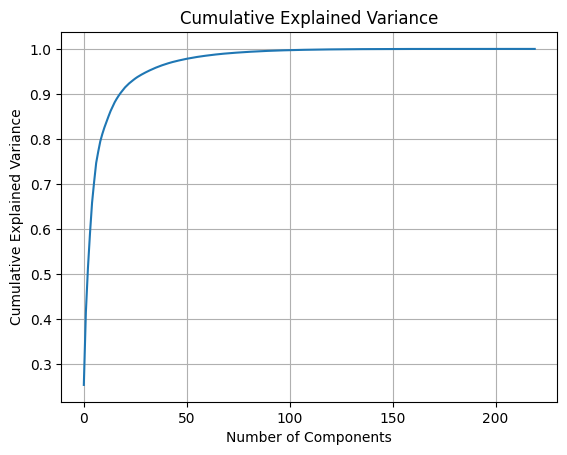

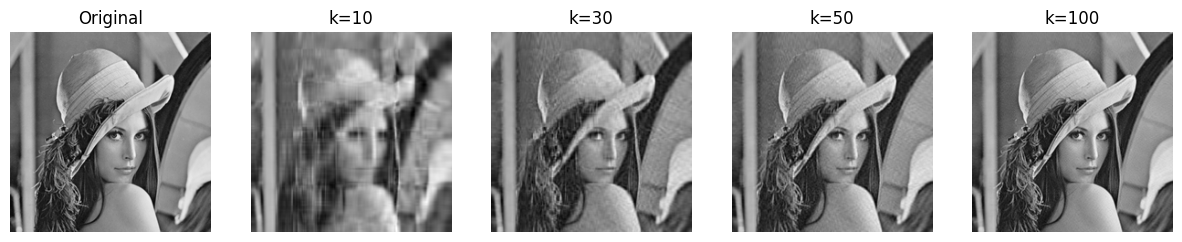

In [ ]:
# 1. Load and standardize grayscale image
data = np.array(gray_image)
mean = np.mean(data, axis=0)
centered_data = data - mean

# 2. Compute covariance matrix and eigenvalues
cov_matrix = np.cov(centered_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# 3. Sort eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Plot explained variance
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
plt.plot(np.cumsum(explained_variance_ratio))
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# 4. Choose k principal components
k_values = [10, 30, 50, 100]
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
axes[0].imshow(data, cmap='gray')
axes[0].set_title("Original")
axes[0].axis("off")

for i, k in enumerate(k_values):
    components = eigenvectors[:, :k]
    compressed_data = np.dot(centered_data, components)
    decompressed_data = np.dot(compressed_data, components.T) + mean
    axes[i+1].imshow(decompressed_data, cmap='gray')
    axes[i+1].set_title(f"k={k}")
    axes[i+1].axis("off")

plt.show()